# What caused the dip in the weekly active users?

## Out line of the problem
- ### Find what caused the dip in the weekly active users (defined by number of users who logged at least one engagement event during the week)

- ### Maximize the return on the time.

- ### Evaluate based on core engagement, retention, and growth metric.

## Possible causes

- ### Customers started using different software. (All metrics of engagement and sign up should go down together)

- ### The software introduced a new feature that changes the way a customer interact with the software. (Different metrics may show different responses).

## Approach
- ### Yammer charges license fees to companies that uses the product. Yammer should care if the number of company that use the product changes or not. Check all metrics for how many companies performed the action.

## Summary
- ### E-mail related category saw a drop in engagement, but search related activity didn't drop as much.

- ### Within E-mail related activity, number of companies that was sending weekly digest and the number of companies whose employees opened the weekly digest was steadly increasing.

- ### Number of users who clicked the link in the E-mail dropped (but was recovering)

- ### Number of companies with new employees signing up was still increasing.

- ### There may have been changes in the way the user interact with the software, but overall number of companies using the software seems to be growing.

## Relevant analyses

In [1]:
#Import necessary packages

import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read in the data: Make rollup periods that correspond to the time range

In [5]:
#Read the rollup periods data and select the correct range.
current_path = os.getcwd()
file = '/datasets/Yammer/dimension_rollup_periods.xlsx'
rollup_periods = pd.read_excel(current_path + file)

data_period=rollup_periods.loc[(rollup_periods['period_id'] == 1007)]

mask = (data_period['pst_start'] >= '2014-5-01') & (data_period['pst_start'] <= '2014-8-25')

selected_period = data_period.loc[mask]
selected_period.reset_index(drop=True)


period_id    time_id  pst_start    pst_end           utc_start  \
0         1007 2014-05-08 2014-05-01 2014-05-08 2014-05-01 07:00:00   
1         1007 2014-05-09 2014-05-02 2014-05-09 2014-05-02 07:00:00   
2         1007 2014-05-10 2014-05-03 2014-05-10 2014-05-03 07:00:00   
3         1007 2014-05-11 2014-05-04 2014-05-11 2014-05-04 07:00:00   
4         1007 2014-05-12 2014-05-05 2014-05-12 2014-05-05 07:00:00   
..         ...        ...        ...        ...                 ...   
112       1007 2014-08-28 2014-08-21 2014-08-28 2014-08-21 07:00:00   
113       1007 2014-08-29 2014-08-22 2014-08-29 2014-08-22 07:00:00   
114       1007 2014-08-30 2014-08-23 2014-08-30 2014-08-23 07:00:00   
115       1007 2014-08-31 2014-08-24 2014-08-31 2014-08-24 07:00:00   
116       1007 2014-09-01 2014-08-25 2014-09-01 2014-08-25 07:00:00   

                utc_end  
0   2014-05-08 07:00:00  
1   2014-05-09 07:00:00  
2   2014-05-10 07:00:00  
3   2014-05-11 07:00:00  
4   2014-05-12 07:00:00  
..                  ...  
112 2014-08-28 07:00:00  
113 2014-08-29 07:00:00  
114 2014-08-30 07:00:00  
115 2014-08-31 07:00:00  
116 2014-09-01 07:00:00  

[117 rows x 6 columns]

In [6]:
#Read in the events data.
file = '/datasets/Yammer/yammer_events.xlsx'
events = pd.read_excel(current_path + file)

In [7]:
#Read in the emails data.
file = '/datasets/Yammer/yammer_emails.xlsx'
emails = pd.read_excel(current_path + file)

In [8]:
#Read in the users data.
file = '/datasets/Yammer/yammer_users.xlsx'
users = pd.read_excel(current_path + file)


### Merge dataframe so we can find the company each user belongs. Ultimately the number of company that uses the product matters more for the Yammer, so check the number of active companies.

In [10]:
event_users = pd.merge(events, users, on = 'user_id', how='inner')

email_users = pd.merge(emails, users, on = 'user_id', how='inner')


### Check the number of companies that had at least one "engagement" in the past week. Confirm that the number does go down.

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

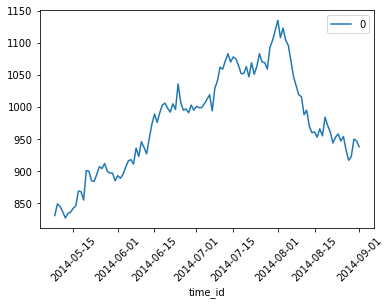

In [11]:
engagement_events=event_users.loc[event_users['event_type']=='engagement']

company_users = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_users_weekly=engagement_events[(engagement_events['occurred_at'] >= selected_period.iloc[rows,2]) & (engagement_events['occurred_at'] < selected_period.iloc[rows,3])]
    #signup_counts[rows,0]=selected_period.iloc[rows,1]
    #period_login=login_events_weekly.count()
    unique_company=company_users_weekly.company_id.unique()
    company_users[rows,0]=unique_company.shape[0]
    
company_u_dataframe = pd.DataFrame(data=company_users, index = selected_period.iloc[:,1])
sb.lineplot(data=company_u_dataframe)
plt.xticks(rotation = 45)

### Check individual activity and see if there is any one activity in particular that goes down.

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

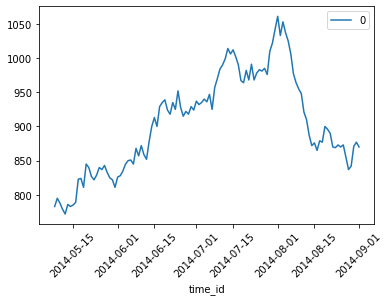

In [12]:
homepage_events=event_users.loc[event_users['event_name']=='home_page']

company_homepage = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_homepage_weekly=homepage_events[(homepage_events['occurred_at'] >= selected_period.iloc[rows,2]) & (homepage_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_homepage_weekly.company_id.unique()
    company_homepage[rows,0]=unique_company.shape[0]
    
homepage_u_dataframe = pd.DataFrame(data=company_homepage, index = selected_period.iloc[:,1])
sb.lineplot(data=homepage_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

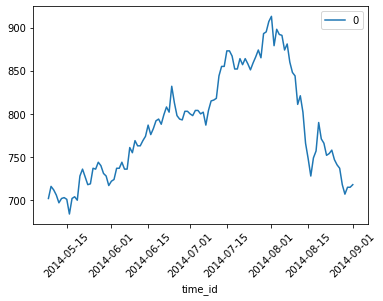

In [13]:
like_events=event_users.loc[event_users['event_name']=='like_message']

company_like = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_like_weekly=like_events[(like_events['occurred_at'] >= selected_period.iloc[rows,2]) & (like_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_like_weekly.company_id.unique()
    company_like[rows,0]=unique_company.shape[0]
    
like_u_dataframe = pd.DataFrame(data=company_like, index = selected_period.iloc[:,1])
sb.lineplot(data=like_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

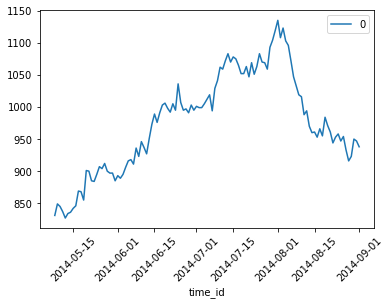

In [14]:
login_events=event_users.loc[event_users['event_name']=='login']

company_login = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_login_weekly=login_events[(login_events['occurred_at'] >= selected_period.iloc[rows,2]) & (login_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_login_weekly.company_id.unique()
    company_login[rows,0]=unique_company.shape[0]
    
login_u_dataframe = pd.DataFrame(data=company_login, index = selected_period.iloc[:,1])
sb.lineplot(data=login_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

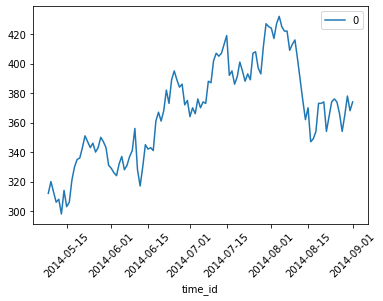

In [15]:
auto_events=event_users.loc[event_users['event_name']=='search_autocomplete']

company_auto = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_auto_weekly=auto_events[(auto_events['occurred_at'] >= selected_period.iloc[rows,2]) & (auto_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_auto_weekly.company_id.unique()
    company_auto[rows,0]=unique_company.shape[0]
    
auto_u_dataframe = pd.DataFrame(data=company_auto, index = selected_period.iloc[:,1])
sb.lineplot(data=auto_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

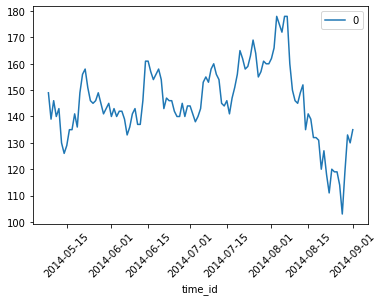

In [16]:
run_events=event_users.loc[event_users['event_name']=='search_run']

company_run = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_run_weekly=run_events[(run_events['occurred_at'] >= selected_period.iloc[rows,2]) & (run_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_run_weekly.company_id.unique()
    company_run[rows,0]=unique_company.shape[0]
    
run_u_dataframe = pd.DataFrame(data=company_run, index = selected_period.iloc[:,1])
sb.lineplot(data=run_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

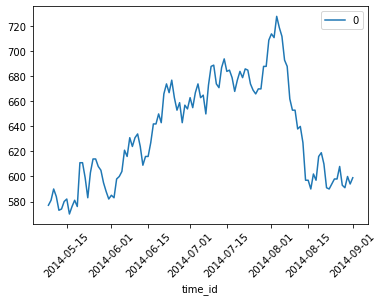

In [17]:
send_events=event_users.loc[event_users['event_name']=='send_message']

company_send = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_send_weekly=send_events[(send_events['occurred_at'] >= selected_period.iloc[rows,2]) & (send_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_send_weekly.company_id.unique()
    company_send[rows,0]=unique_company.shape[0]
    
send_u_dataframe = pd.DataFrame(data=company_send, index = selected_period.iloc[:,1])
sb.lineplot(data=send_u_dataframe)
plt.xticks(rotation = 45)

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

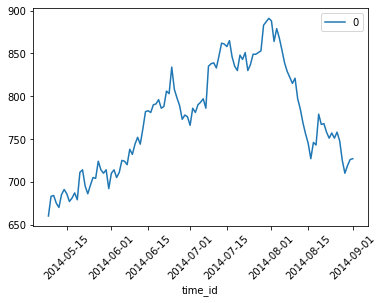

In [18]:
view_events=event_users.loc[event_users['event_name']=='view_inbox']

company_view = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_view_weekly=view_events[(view_events['occurred_at'] >= selected_period.iloc[rows,2]) & (view_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_view_weekly.company_id.unique()
    company_view[rows,0]=unique_company.shape[0]
    
view_u_dataframe = pd.DataFrame(data=company_view, index = selected_period.iloc[:,1])
sb.lineplot(data=view_u_dataframe)
plt.xticks(rotation = 45)

### Events related to e-mails dropped the most. Events related to searches don't drop as much, or in the process of recovery. Check what type of e-mail events drop the most.

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

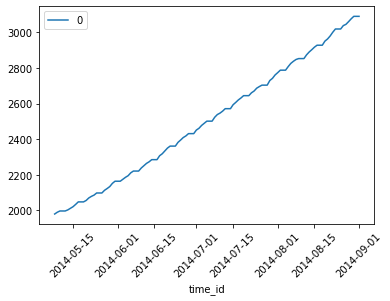

In [19]:
digest_events=email_users.loc[email_users['action']=='sent_weekly_digest']
company_digest = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_digest_weekly=digest_events[(digest_events['occurred_at'] >= selected_period.iloc[rows,2]) & (digest_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_digest_weekly.company_id.unique()
    company_digest[rows,0]=unique_company.shape[0]
    
digest_u_dataframe = pd.DataFrame(data=company_digest, index = selected_period.iloc[:,1])
sb.lineplot(data=digest_u_dataframe)
plt.xticks(rotation = 45)

### Number of company that is sending weekly digest is increasing linearly

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

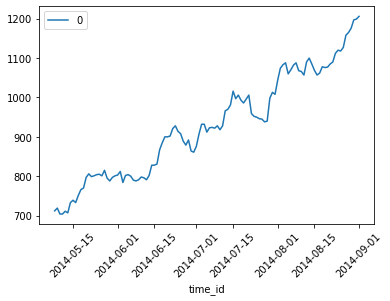

In [20]:
open_events=email_users.loc[email_users['action']=='email_open']
company_open = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_open_weekly=open_events[(open_events['occurred_at'] >= selected_period.iloc[rows,2]) & (open_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_open_weekly.company_id.unique()
    company_open[rows,0]=unique_company.shape[0]
    
open_u_dataframe = pd.DataFrame(data=company_open, index = selected_period.iloc[:,1])
sb.lineplot(data=open_u_dataframe)
plt.xticks(rotation = 45)

### Companies are opeing the E-mail that they received.

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

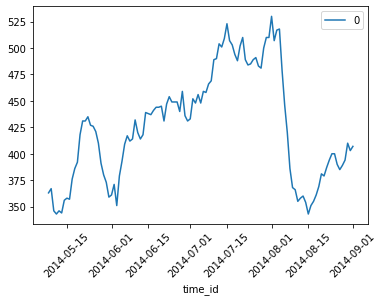

In [21]:
click_events=email_users.loc[email_users['action']=='email_clickthrough']
company_click = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_click_weekly=click_events[(click_events['occurred_at'] >= selected_period.iloc[rows,2]) & (click_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_click_weekly.company_id.unique()
    company_click[rows,0]=unique_company.shape[0]
    
click_u_dataframe = pd.DataFrame(data=company_click, index = selected_period.iloc[:,1])
sb.lineplot(data=click_u_dataframe)
plt.xticks(rotation = 45)

### Number of companies whose users have clicked at least once in a week decreased, but coming back up

(array([735368., 735385., 735399., 735415., 735429., 735446., 735460.,
        735477.]), <a list of 8 Text xticklabel objects>)

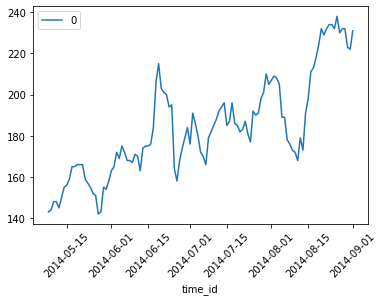

In [22]:
signup_events=event_users.loc[event_users['event_name']=='complete_signup']

company_signup = np.zeros((selected_period.shape[0],1))

#Go through the rolling time periods and count the signup events.
for rows in range (selected_period.shape[0]):
    #Select only the events during that period.
    company_signup_weekly=signup_events[(signup_events['occurred_at'] >= selected_period.iloc[rows,2]) & (signup_events['occurred_at'] < selected_period.iloc[rows,3])]
    unique_company=company_signup_weekly.company_id.unique()
    company_signup[rows,0]=unique_company.shape[0]
    
signup_u_dataframe = pd.DataFrame(data=company_signup, index = selected_period.iloc[:,1])
sb.lineplot(data=signup_u_dataframe)
plt.xticks(rotation = 45)

### Companies are still signing up users (after some dip)

## Results

- ### Some E-mail related actions have decreased but other actions remained to increase, suggesting that the way the users interact with the software may have changed.

- ### Check with the software developers to see if there were any new features added around beginning of August.

- ### If the drop in the E-mail related activity and login was an expected outcome from the change in the software, the company do not need to plan any response.

## Future directions

- ### Check if there were any differences in the activity based on the location or device.